# Practice Project 4_Abalone Age Predictions

# Abalone Case Study is a regressio based problem statement to detect the age of abalones. The age of abalones is determied by number of rings in its body. In the features vector, there are various aspects of its body that can be used to determine its age.

# Importing Data From Github repository dsrscientist/dataset1/master/abalone.csv

In [3]:
import pandas as pd
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
print('DataFrame View: ')
print('View 1: Head View: ', end='\n'*2)
print(data.head(), end='\n'*2)
print('View 2: Sample View: ', end='\n'*2)
print(data.sample(), end='\n'*2)
print('View 3: Tail View: ', end='\n'*2)
print(data.tail(), end='\n'*2)

DataFrame View: 
View 1: Head View: 

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  

View 2: Sample View: 

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
2001   I    0.36      0.27   0.085        0.2185          0.1065   

      Viscera weight  Shell weight  Rings  
2001           0.038         0.062      6  

View 3: Tail View: 

     Sex  Length  Diameter  Height  Whole weight  Shuc

In [5]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
data.shape

(4177, 9)

In [7]:
type(data), type(data.columns)

(pandas.core.frame.DataFrame, pandas.core.indexes.base.Index)

In [8]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
data.isna().values.any()

False

# Observations:
1. There are 4177 rows and 9 columns.
2. There are 1 categorical columns and 8 continuous columns.
3. Therefore, useful columns are very low. To increase information gain, I will do encoding of ordinal data and fetaure engineering in further steps.
4. There are no null or missing values, hence, imputation and missing values traeatment are not required.

# Encoding Of Ordinal Data

In [16]:
import numpy as np
# from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data[['Sex']])
result

array([[2.],
       [2.],
       [0.],
       ...,
       [2.],
       [0.],
       [2.]])

In [17]:
len(result)

4177

In [18]:
len(data)

4177

In [19]:
encoded_data=pd.DataFrame(data=result, columns=['sex_encoded'])
encoded_data

,sex_encoded
0,2.0
1,2.0
2,0.0
3,2.0
4,1.0
...,...
4172,0.0
4173,2.0
4174,2.0
4175,0.0


In [20]:
new_data=pd.concat([data, encoded_data], axis=1, ignore_index=False)
new_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,sex_encoded
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1.0
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0.0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2.0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2.0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0.0


In [63]:
data=new_data.drop('Sex', axis=1)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   sex_encoded     4177 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


In [65]:
data.isna().values.any()

False

In [66]:
data.isnull().any()

Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
sex_encoded       False
dtype: bool

# EDA

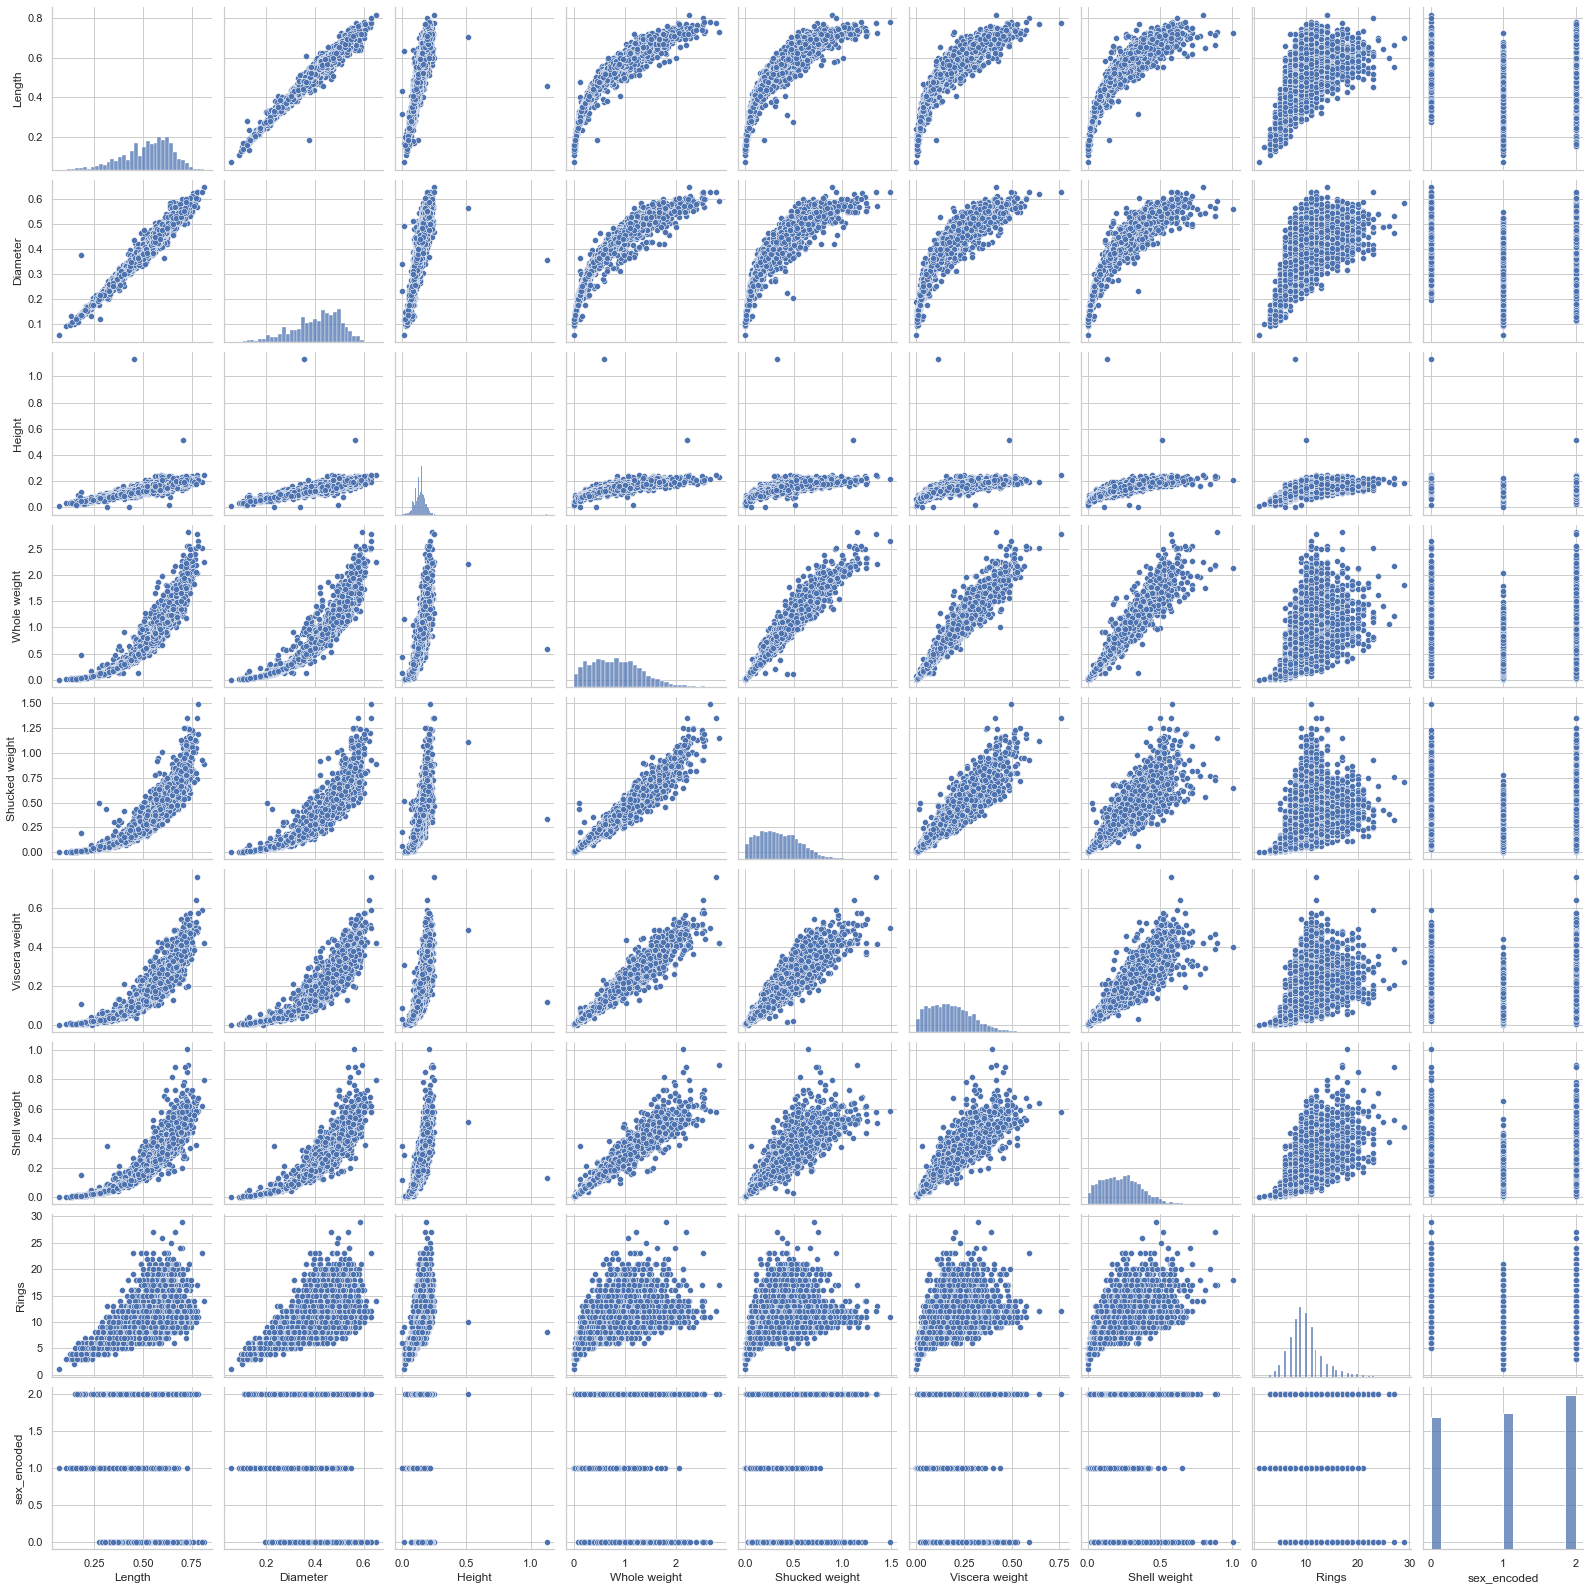

In [67]:
import seaborn as sns
sns.pairplot(data)

In [68]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,sex_encoded
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,-0.036066
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,-0.038874
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,-0.042077
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,-0.021391
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,-0.001373
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,-0.032067
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,-0.034854
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,-0.034627
sex_encoded,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627,1.000000


In [69]:
data.corr()['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
sex_encoded      -0.034627
Name: Rings, dtype: float64

<AxesSubplot:>

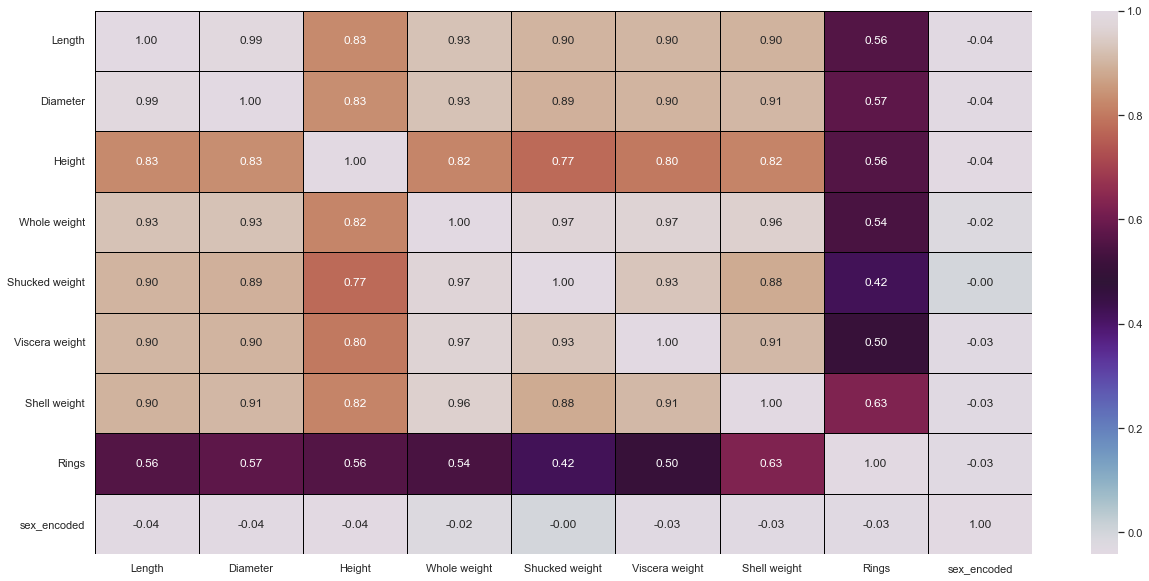

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, linecolor='black', fmt='.2f', cmap='twilight')

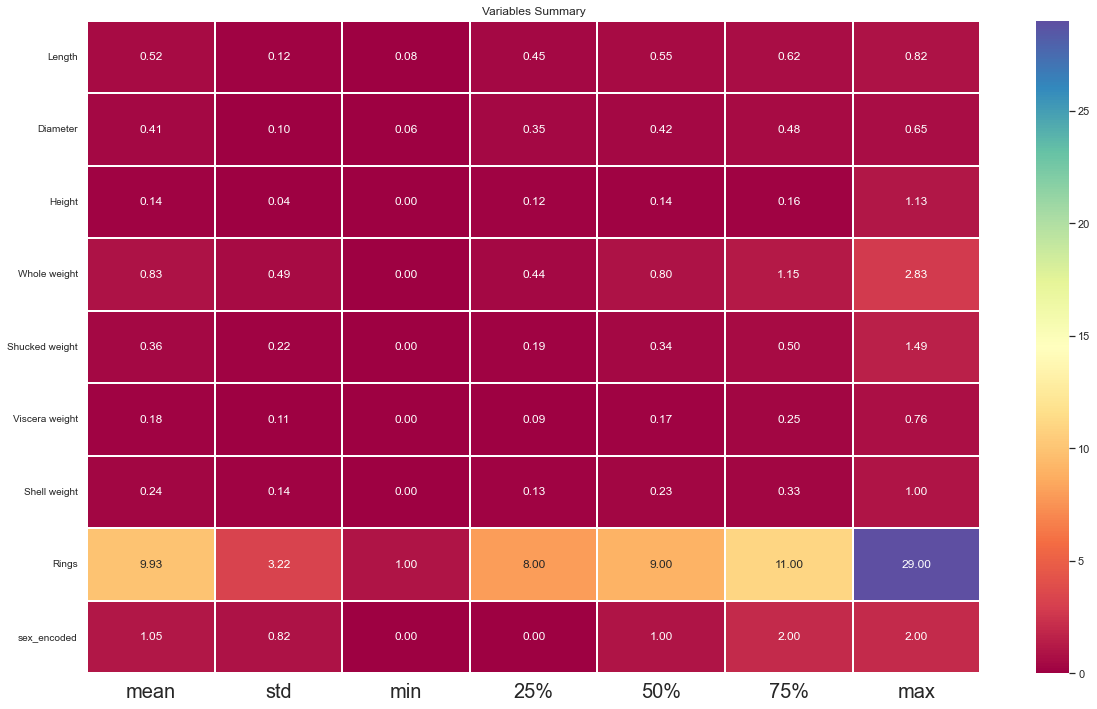

In [71]:
import numpy as np
mask = np.zeros_like(round(data.describe()[1:].transpose(),2))
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,12))
sns.heatmap(round(data.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt='.2f', square=False, cmap="Spectral")
plt.xticks(fontsize=20)
plt.yticks(fontsize=10)
plt.title('Variables Summary')
plt.savefig('heatmap.png')
plt.show()

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   sex_encoded     4177 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


In [73]:
data.select_dtypes(include = [np.number]).columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'sex_encoded'],
      dtype='object')

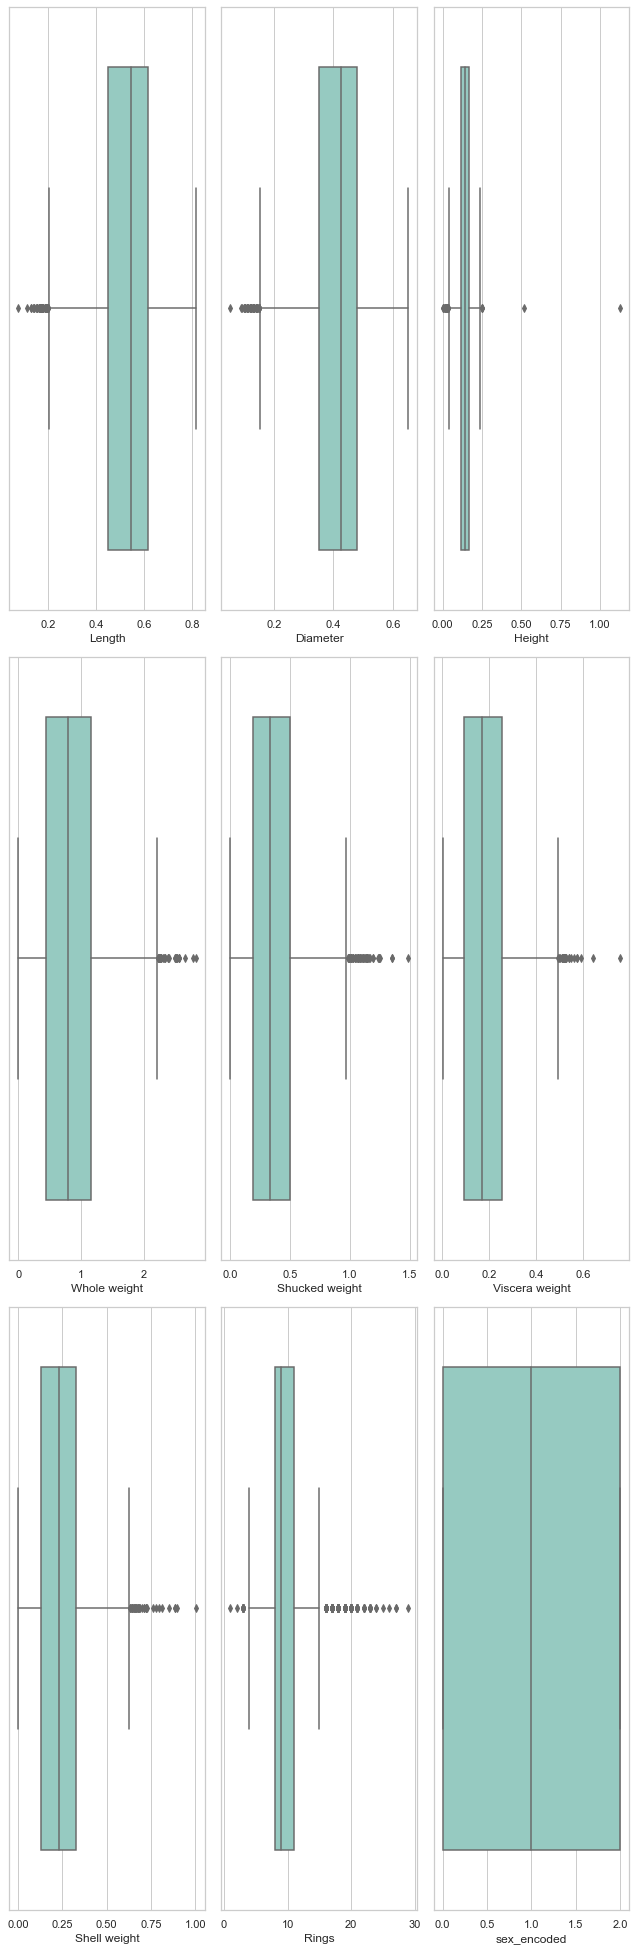

In [74]:
import warnings
warnings.filterwarnings('ignore')
colist=data.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(0,len(colist)):
    sns.set_theme(style='whitegrid')
    plt.subplot(nrows, ncol, x+1)
    sns.boxplot(data[colist[x]], color='Black', palette='Set3')
    plt.tight_layout()

In [75]:
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
sex_encoded      -0.098155
dtype: float64

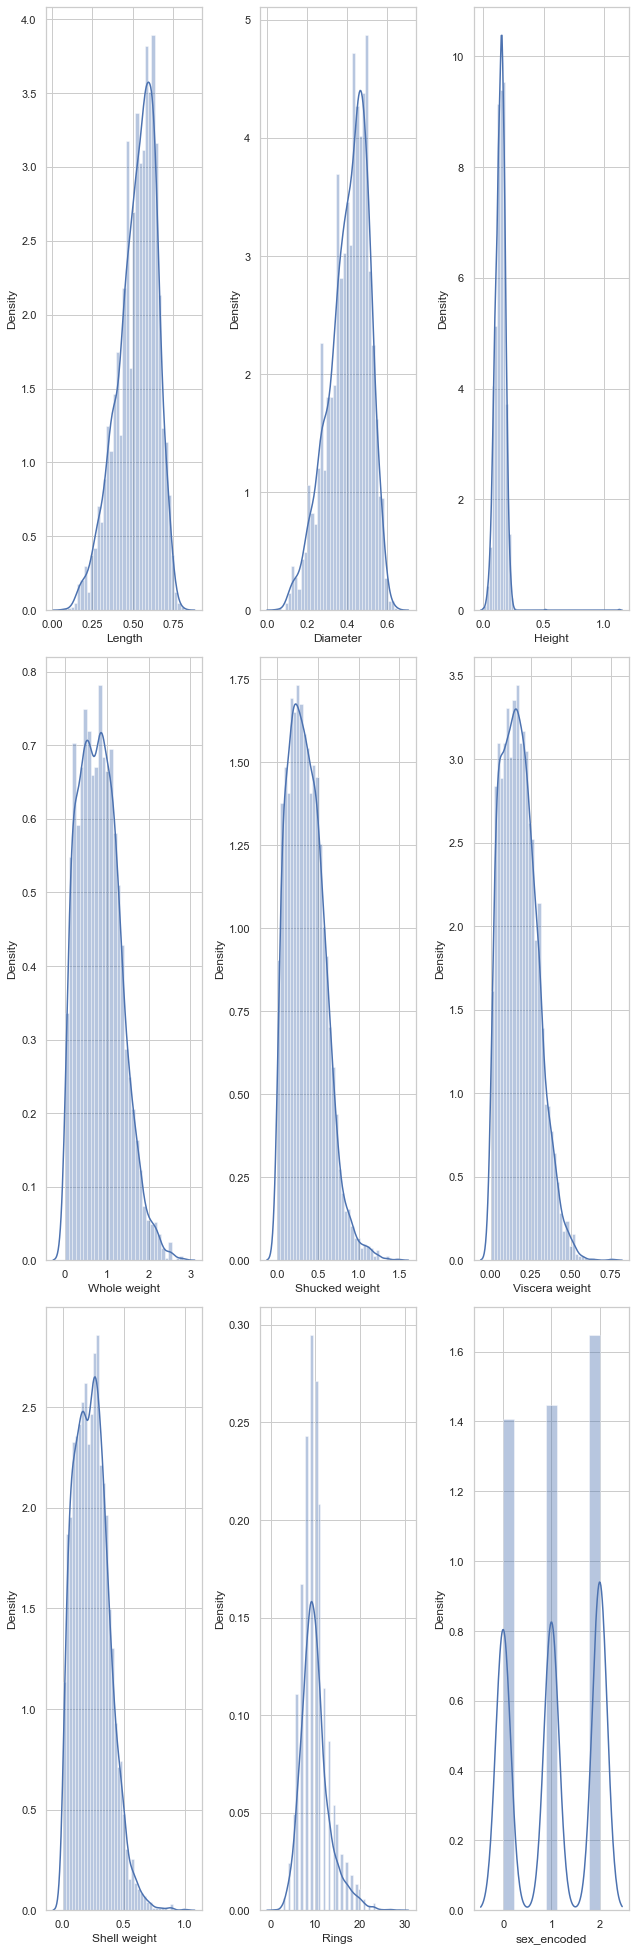

In [76]:
colist=data.select_dtypes(include = [np.number]).columns
ncol=3
nrows=10
plt.figure(figsize=(ncol*3, ncol*30))
for x in range(0,len(colist)):
    sns.set_theme(style='whitegrid')
    plt.subplot(nrows, ncol, x+1)
    sns.distplot(data[colist[x]])
    plt.tight_layout()

# Observations
1. Sex encoded is negatively correlated with all other features and label.
2. Across all 4177 ring, sex encodeed range from 0 to 2.
3. Features having strong positive and positive correlation with label are:
Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
4. Features having strong negative and negative correlation are:
sex_encoded      -0.034627
5. Correlation of feature with itself is of no  relevance.
6. Left Skewness is found in:
Length           -0.639873
Diameter         -0.609198
sex_encoded      -0.098155
7. Right Skewness is found in:
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
8. High number of outliers can be noticed in all the columns.

# Z Score: Outliers Treatment

In [77]:
import numpy as np
from scipy.stats import stats
score=np.abs(stats.zscore(data))
score.shape

(4177, 9)

In [78]:
#threshold=(-3,3)
threshold=3
print(np.where(score>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [79]:
data.iloc[4]

Length            0.3300
Diameter          0.2550
Height            0.0800
Whole weight      0.2050
Shucked weight    0.0895
Viscera weight    0.0395
Shell weight      0.0550
Rings             7.0000
sex_encoded       1.0000
Name: 4, dtype: float64

In [80]:
len(np.where(score>3)[0])

200

In [81]:
data_new=data[(score<3).all(axis=1)]
data_new

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,sex_encoded
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1.0
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0.0


# In this section, I have identified outliers in 200 rows and removed those from the dataset, to make more precise prediction.

# Vectorization

In [82]:
x=data_new.drop('Rings', axis=1)
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,sex_encoded
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1.0
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0.0


In [83]:
y=data_new['Rings']
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4027, dtype: int64

# I have removed Rings from the data and parsed all other features in  x vector, I have parsed rings in y vector.

# Standard Scaler Transformation And Variance Inflation Factor

In [84]:
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled_frame=pd.DataFrame(X_scaled, columns=x.columns)
X_scaled_frame

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,sex_encoded
0,-0.569368,-0.420274,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659,1.159698
1,-1.475358,-1.463127,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033,1.159698
2,0.077768,0.153294,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629,-1.285382
3,-0.698795,-0.420274,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574,1.159698
4,-1.647928,-1.567412,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290,-0.062842
...,...,...,...,...,...,...,...,...
4022,0.379764,0.466150,0.732171,0.184584,0.101275,0.612382,0.143240,-1.285382
4023,0.595476,0.361865,-0.081420,0.357779,0.435609,0.375293,0.233138,1.159698
4024,0.681761,0.726863,1.816959,0.818169,0.854737,1.081721,0.604453,1.159698
4025,0.897473,0.831148,0.325376,0.639493,0.881387,0.825278,0.510647,-1.285382


In [85]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled, w) for w in range(X_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,38.928927,Length
1,40.446626,Diameter
2,6.545434,Height
3,107.994846,Whole weight
4,28.566582,Shucked weight
5,17.084642,Viscera weight
6,23.491177,Shell weight
7,1.009229,sex_encoded


# Since, all the features reflect high vif, reflecting high multicollinearity, it is not possible to remove all the features, hence, I have started by removing Whole Weight that has highest vif.

In [99]:
x=X_scaled_frame.drop(['Whole weight'], axis=1)
x

,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight,sex_encoded
0,-0.569368,-0.420274,-1.166207,-0.603733,-0.723057,-0.630659,1.159698
1,-1.475358,-1.463127,-1.301806,-1.209410,-1.231104,-1.256033,1.159698
2,0.077768,0.153294,-0.081420,-0.448680,-0.331135,-0.161629,-1.285382
3,-0.698795,-0.420274,-0.352617,-0.647342,-0.597255,-0.591574,1.159698
4,-1.647928,-1.567412,-1.573003,-1.257865,-1.318198,-1.373290,-0.062842
...,...,...,...,...,...,...,...
4022,0.379764,0.466150,0.732171,0.101275,0.612382,0.143240,-1.285382
4023,0.595476,0.361865,-0.081420,0.435609,0.375293,0.233138,1.159698
4024,0.681761,0.726863,1.816959,0.854737,1.081721,0.604453,1.159698
4025,0.897473,0.831148,0.325376,0.881387,0.825278,0.510647,-1.285382


In [100]:
X_scaled=np.array(X_scaled_frame.drop('Whole weight', axis=1))
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled, w) for w in range(X_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,38.928926,Length
1,40.442393,Diameter
2,6.543422,Height
3,9.223602,Shucked weight
4,10.772491,Viscera weight
5,10.258234,Shell weight
6,1.009113,sex_encoded


In [101]:
X_scaled_frame.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'sex_encoded'],
      dtype='object')

In [102]:
x=x.drop('Diameter', axis=1)
x

,Length,Height,Shucked weight,Viscera weight,Shell weight,sex_encoded
0,-0.569368,-1.166207,-0.603733,-0.723057,-0.630659,1.159698
1,-1.475358,-1.301806,-1.209410,-1.231104,-1.256033,1.159698
2,0.077768,-0.081420,-0.448680,-0.331135,-0.161629,-1.285382
3,-0.698795,-0.352617,-0.647342,-0.597255,-0.591574,1.159698
4,-1.647928,-1.573003,-1.257865,-1.318198,-1.373290,-0.062842
...,...,...,...,...,...,...
4022,0.379764,0.732171,0.101275,0.612382,0.143240,-1.285382
4023,0.595476,-0.081420,0.435609,0.375293,0.233138,1.159698
4024,0.681761,1.816959,0.854737,1.081721,0.604453,1.159698
4025,0.897473,0.325376,0.881387,0.825278,0.510647,-1.285382


# After removing whole weight, there is not much difference in vif scores, hence, I have removed Diameter that shows second highest vif score.

In [103]:
X_scaled=np.array(X_scaled_frame.drop(['Diameter', 'Whole weight'], axis=1))
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled, w) for w in range(X_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,9.596262,Length
1,6.401361,Height
2,9.215078,Shucked weight
3,10.737785,Viscera weight
4,9.825881,Shell weight
5,1.008705,sex_encoded


# Now, multicollinearity is seeming low, yet, Viscera weight has a score of more than 10. Hence, I will remove that feature too.

In [104]:
x=x.drop('Viscera weight', axis=1)
x

,Length,Height,Shucked weight,Shell weight,sex_encoded
0,-0.569368,-1.166207,-0.603733,-0.630659,1.159698
1,-1.475358,-1.301806,-1.209410,-1.256033,1.159698
2,0.077768,-0.081420,-0.448680,-0.161629,-1.285382
3,-0.698795,-0.352617,-0.647342,-0.591574,1.159698
4,-1.647928,-1.573003,-1.257865,-1.373290,-0.062842
...,...,...,...,...,...
4022,0.379764,0.732171,0.101275,0.143240,-1.285382
4023,0.595476,-0.081420,0.435609,0.233138,1.159698
4024,0.681761,1.816959,0.854737,0.604453,1.159698
4025,0.897473,0.325376,0.881387,0.510647,-1.285382


In [105]:
X_scaled=np.array(X_scaled_frame.drop(['Diameter', 'Whole weight', 'Viscera weight'], axis=1))
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled, w) for w in range(X_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,9.461747,Length
1,6.321326,Height
2,6.801555,Shucked weight
3,8.768306,Shell weight
4,1.006335,sex_encoded


# Now, all the features, seem to have lower multi collinearity, as the number of features is already reduced to 5, I will not lessen the columns more and apply p values feature selection, to deciede which features to include.

# Feature Selection

In [106]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_selection import VarianceThreshold

In [107]:
Xf_train, Xf_test, Y_train, Y_test=train_test_split(x,y,test_size=0.10)

In [108]:
constant_filter=VarianceThreshold(threshold=0.04)
constant_filter.fit(Xf_train)
Xf_train_filter=constant_filter.transform(Xf_train)
Xf_test_filter=constant_filter.transform(Xf_test)

<AxesSubplot:>

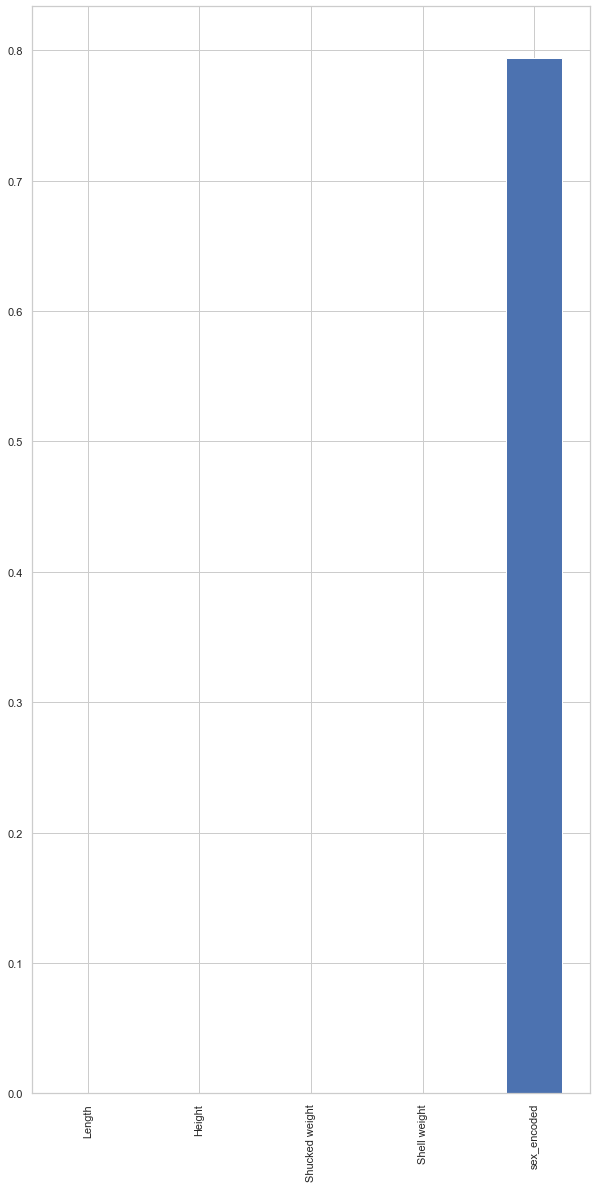

In [109]:
sel=f_classif(Xf_train, Y_train)
p_values=pd.Series(sel[1])
p_values.index=Xf_train.columns
p_values.sort_values(ascending=True, inplace=True)
p_values.plot.bar(figsize=(10,20))

In [110]:
p_values=p_values[p_values<0.05]
p_values.index

Index(['Length', 'Height', 'Shucked weight', 'Shell weight'], dtype='object')

# P Values are an important component of feature selection, with significance level set to 0.05, Variance Threshold
    ensemble technique returns with 95% confidence, all the features that have maximum explanatory capacity
For the present dataset features with pvalues with less than 0.05 are:
Index(['Length', 'Height', 'Shucked weight', 'Shell weight'], dtype='object')

In [111]:
import numpy as np
x=x[['Length', 'Height', 'Shell weight', 'Shucked weight']]
x.sample()

,Length,Height,Shell weight,Shucked weight
195,0.034625,0.86777,0.620088,-0.356617


In [112]:
y.sample()

2014    10
Name: Rings, dtype: int64

In [113]:
x.shape, y.shape

((4027, 4), (4027,))

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [115]:
x_train.shape, y_train.shape

((3624, 4), (3624,))

# Model Developme, Evaluation And Saving

# Model 1

# Random Forest Regressor With Grid Search CV Hyper Parameter Tuning

In [121]:
from sklearn.ensemble import RandomForestRegressor as el
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt
import pickle
rfc2=el()
params = {
 'n_estimators': [50, 100],
 'criterion' : ['squared_error','absolute_error', 'poisson'],
 'bootstrap': [True, False],
 'oob_score':[True, False],
 'n_jobs':[None,-1],
 'warm_start':[True, False]
}
score2 = make_scorer(mean_squared_error)
gridsearch=GridSearchCV(rfc2, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)
best_parameters=gridsearch.best_params_
best_score=gridsearch.best_score_
best_estim=gridsearch.best_estimator_
best_estim.fit(x_train,y_train)
y_pred2=best_estim.predict(x_train)
mse2 = mean_squared_error(y_pred2,y_train)
model3_train_score=best_estim.score(x_train, y_train)
model3_test_score=best_estim.score(x_test, y_test)
rmse2=np.sqrt(mse2)
ytst_pred2=best_estim.predict(x_test)
mse_test2=mean_squared_error(ytst_pred2,y_test)
rmse_test2=np.sqrt(mse_test2)
model3_save=pickle.dumps(best_estim)
model3_prediction_train=pd.DataFrame({'y_train':y_train, 'yhat':y_pred2})
model3_prediction_test=pd.DataFrame({'y_test':y_test, 'yhat':ytst_pred2})

In [146]:
print('Train Score: ',model3_train_score)
print('Test Score: ',model3_test_score)
print('MSE Train: ',mse2)
print('RMSE Train: ',rmse2)
print('MSE Test: ',mse_test2)
print('RMSE Train: ',rmse_test2)

Train Score:  0.9187665463763404
Test Score:  0.5044844930259231
MSE Train:  0.6641462403421633
RMSE Train:  0.8149516797590906
MSE Test:  4.187142493796526
RMSE Train:  2.046250838435143



# Model 2

# Random Forest Regressor With Default Hyper Parameter Tuning

In [123]:
from sklearn.ensemble import RandomForestRegressor as el
from sklearn.model_selection import cross_val_score
rfc=el()
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))
scores=cross_val_score(rfc, x, y, cv=5)
cv_scores=scores.mean()
print(scores.std())
print(cv_scores)

0.9296732586517995
0.5131791550079863
0.1168822454475318
0.39505811613755515


In [142]:
model3_save=pickle.dumps(rfc)

# Model 3

# Ada Boost Regressor And Random Forest Regressor With Grid Search CV Hyper Parameter Tuning and Ada Boost Boosting

In [124]:
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import matplotlib.pyplot as plt
abreg = AdaBoostRegressor()
params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
score = make_scorer(mean_squared_error)
print(score)

make_scorer(mean_squared_error)


In [125]:
gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)
GridSearchCV(cv=5, error_score='raise', estimator=AdaBoostRegressor(base_estimator=rfc, learning_rate=1.0,loss='linear', n_estimators=50, random_state=None), n_jobs=1, param_grid={'n_estimators': [50, 100],'learning_rate': [0.01, 0.05, 0.1, 0.5],'loss': ['linear', 'square', 'exponential']},pre_dispatch='2*n_jobs', refit=True, return_train_score=True,scoring=None, verbose=0) 

GridSearchCV(cv=5, error_score='raise',
             estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor()),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [126]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50}
0.4650231558491864


In [127]:
best_estim=gridsearch.best_estimator_
print(best_estim)

AdaBoostRegressor(learning_rate=0.1, loss='exponential')


In [128]:
best_estim.fit(x_train,y_train)

ytr_pred=best_estim.predict(x_train)
mse = mean_squared_error(ytr_pred,y_train)
print('Train Score: ', best_estim.score(x_train, y_train))
print('Test score: ', best_estim.score(x_test, y_test))

Train Score:  0.4879890579941727
Test score:  0.4742171930891004


In [131]:
ytst_pred=best_estim.predict(x_test)
print('mse_train', mse)
print('rmse_train', np.sqrt(mse))
mse_test = mean_squared_error(ytst_pred,y_test)
print('mse_test', mse_test)
print('rmse_test', np.sqrt(mse_test))

mse_train 4.186085005355211
rmse_train 2.045992425537106
mse_test 4.442903405320504
rmse_test 2.1078195855719017


In [143]:
model3_save=pickle.dumps(abreg)

# Model 4

# Extra Trees Regressor With Grid Search CV Hyper Parameter Tuning

In [132]:
abreg = sklearn.ensemble.ExtraTreesRegressor()
params = {
 'n_estimators': [50, 100],
 'max_samples' : [0.01, 0.05, 0.1, 0.5],
 'bootstrap' : [True, False],
 'oob_score' : [True, False],
 'warm_start' : [True, False],
 'n_jobs'  : [1,-1],
 'random_state' : [0,10,100,1000,10000,100000,100000],
 'criterion' : ['squared_error', 'absolute_error'] 
 }
score = make_scorer(mean_squared_error)
print(score)

make_scorer(mean_squared_error)


In [133]:
gridsearch=GridSearchCV(abreg, params, cv=5, return_train_score=True)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_samples': [0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [50, 100], 'n_jobs': [1, -1],
                         'oob_score': [True, False],
                         'random_state': [0, 10, 100, 1000, 10000, 100000,
                                          100000],
                         'warm_start': [True, False]},
             return_train_score=True)

In [134]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'bootstrap': True, 'criterion': 'squared_error', 'max_samples': 0.1, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': True, 'random_state': 100000, 'warm_start': True}
0.525483226268485


In [135]:
best_estim=gridsearch.best_estimator_
print(best_estim)

ExtraTreesRegressor(bootstrap=True, max_samples=0.1, n_jobs=1, oob_score=True,
                    random_state=100000, warm_start=True)


In [136]:
best_estim.fit(x_train,y_train)

ytr_pred=best_estim.predict(x_train)
yts_pred=best_estim.predict(x_test)
mse = mean_squared_error(ytr_pred,y_train)
print('Train Score: ', best_estim.score(x_train, y_train))
print('Test score: ', best_estim.score(x_test, y_test))
print('mse_train: ', mse)
print('rmse_train', np.sqrt(mse))
mse_test=mean_squared_error(yts_pred,y_test)
print('mse_train: ', mse_test)
print('rmse_train', np.sqrt(mse_test))

Train Score:  0.607950328793362
Test score:  0.5317277182942185
mse_train:  3.2053089403973516
rmse_train 1.7903376610006705
mse_train:  3.95693523573201
rmse_train 1.989204674168048


In [144]:
model3_save=pickle.dumps(abreg)

# Model5

# Linear Regression With Intuitional Hyper Parameter Tuning

In [137]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression(fit_intercept=True,n_jobs=-1, positive=True)
lm.fit(x_train, y_train)

LinearRegression(n_jobs=-1, positive=True)

In [138]:
lm.score(x_train, y_train)

0.4030999466093744

In [139]:
lm.score(x_test, y_test)

0.39343588221382375

In [141]:
ytr_pred=lm.predict(x_train)
yts_pred=lm.predict(x_test)
mse = mean_squared_error(ytr_pred,y_train)
print('Train Score: ', lm.score(x_train, y_train))
print('Test score: ', lm.score(x_test, y_test))
print('mse_train: ', mse)
print('rmse_train', np.sqrt(mse))
mse_test=mean_squared_error(yts_pred,y_test)
print('mse_train: ', mse_test)
print('rmse_train', np.sqrt(mse_test))

Train Score:  0.4030999466093744
Test score:  0.39343588221382375
mse_train:  4.880119072075973
rmse_train 2.2090991539711324
mse_train:  5.125511426078476
rmse_train 2.263959236841175


In [145]:
model3_save=pickle.dumps(lm)

# All the models have been saved in pickle

# Conclusion
The best model with right fit is: Model4: Extra Trees Regressor With Grid Search CV Hyper Parameter Tuning. It has scores:
Train Score:  0.607950328793362
Test score:  0.5317277182942185
mse_train:  3.2053089403973516
rmse_train 1.7903376610006705
mse_train:  3.95693523573201
rmse_train 1.989204674168048
Although error, seems to be quite high but can be put through Bagging and Boosting Methods to increase its accuracies.


The other models that have reached more than 90% in train phase are mostly overfittied and bias variance analysis need to be done, which might take a lot more time than I have in hand.

Hence, I would conclude it so.        

# Credits:
DataTrained and Python Documentations.